<a id = "1"></a>
## 1. Importing the libraries

In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as colors
import seaborn as sns
import seaborn as sns
sns.set(rc={"axes.facecolor":"#F9F9F9", "figure.facecolor":"#F9F9F9"})
palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "#92A8D1", "#955251"]
sns.set_palette(palette)
cmap = colors.ListedColormap(palette)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

<a id = "2"></a>
## 2. Load and Prepare Data

In [32]:
data = pd.read_csv('../input/mall-customers/Mall_Customers.csv')

<a id = "3"></a>
## 3. EDA

In [33]:
data.shape

(200, 5)

In [34]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
data.rename(columns = {'Genre':'Gender'} , inplace = True)

In [37]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<a id = "4"></a>
## 4. Data Preprocessing

<a id = "4_1"></a>
<h2>4-1. Drop Unwanted columns</h2>

In [38]:
data.drop(labels = 'CustomerID' , axis = 1 , inplace = True)

<a id = "4_2"></a>
<h2>4-2. Missing values</h2>

In [39]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<a id = "4_3"></a>
<h2>4-3. Encoding</h2>

In [40]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [41]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [42]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [44]:
data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


<a id = "5"></a>
## 5. Strorytelling - Visualization

<a id = "5_1"></a>
<h2>5-1. Heatmap: correlation between features</h2>

<AxesSubplot:>

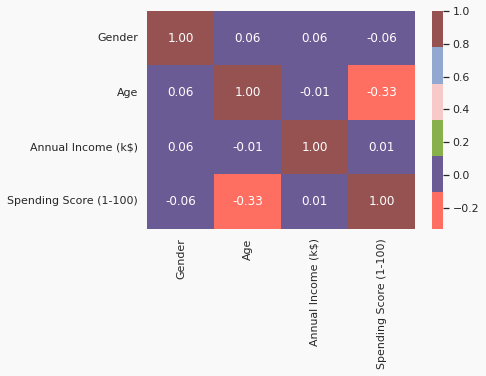

In [45]:
sns.heatmap(data = data.corr() , annot = True , fmt = '.2f' , cmap = cmap)

<h2 >The heatmap indicates a strong correlation between customer age and spending score. We will examine the relationship between age and spending score.</h2>


### Violin Plot of the DataFrame with Gender Comparison

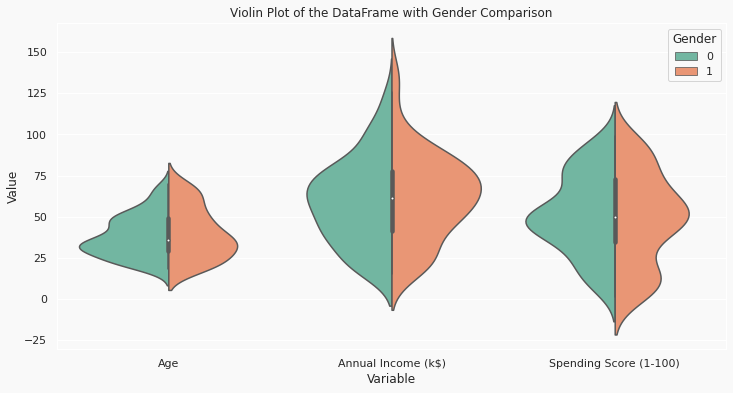

In [46]:
df_long = pd.melt(data, id_vars=["Gender"], 
                  value_vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"],
                  var_name="Variable", value_name="Value")

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_long, x="Variable", y="Value", hue="Gender", split=True, palette="Set2")
plt.title("Violin Plot of the DataFrame with Gender Comparison")
plt.show()

<a id = "5_2"></a>
<h2>5-2. Relation between gender and spending score</h2>

Text(0.5, 1.0, 'Customer Gender Distribution')

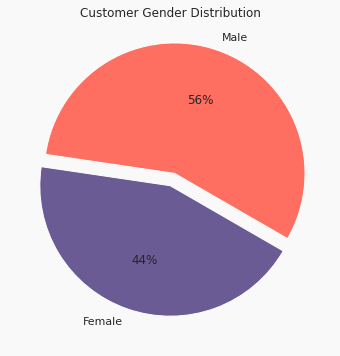

In [47]:
plt.figure(figsize=(10,6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=['Male', 'Female'], 
        startangle=-30, explode=[0.1, 0], autopct='%.0f%%')
plt.title("Customer Gender Distribution")



<h2 >The graph clearly indicates that the number of female customers exceeds that of male customers within our customer base.</h2>

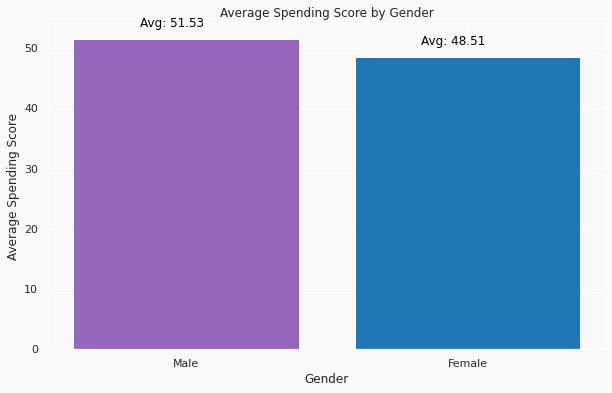

In [48]:
plt.figure(figsize=(10,6))
avg_scores = data.groupby('Gender')['Spending Score (1-100)'].mean()
plt.bar(x=['Male', 'Female'], height=avg_scores, color=['tab:purple', 'tab:blue'])
plt.title('Average Spending Score by Gender')
plt.ylabel('Average Spending Score')
plt.xlabel('Gender')

# Annotating the average scores on the bar chart
for i, score in enumerate(avg_scores):
    plt.text(i - 0.05, score + 2, f'Avg: {score:.2f}', ha='center', color='black')

# Display the plots
plt.show()


<h2 >The graph highlights that, on average, our female customers exhibit a higher spending score compared to their male counterparts.</h2>

<a id = "5_3"></a>
<h2>5-3. Relation between age and spending score</h2>

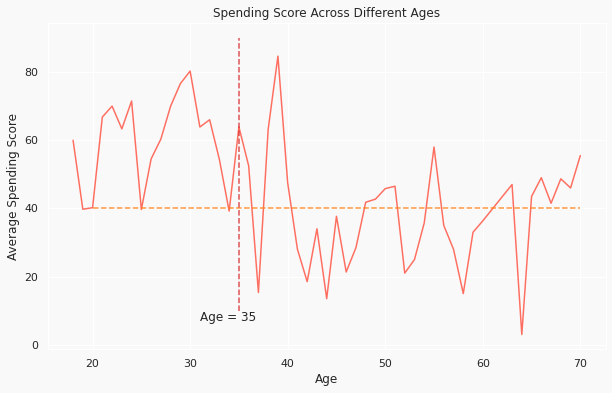

In [49]:
# List of unique ages from the dataset
ageList = data['Age'].unique()
ageList.sort()

# List to hold average spending scores
avgSpendingList = []

# Calculating the average spending score for each age
for age in ageList:
    avgSpending = data[data['Age'] == age]['Spending Score (1-100)'].mean()
    avgSpendingList.append(avgSpending)

# Plotting the age vs average spending score
plt.figure(figsize=(10,6))
plt.plot(ageList, avgSpendingList)
plt.xlabel('Age')
plt.ylabel('Average Spending Score')
plt.title('Spending Score Across Different Ages')

# Adding a horizontal dashed line
plt.plot([20, 70], [40, 40], linestyle='--', color='tab:orange', alpha=0.8)

# Adding a vertical dashed line
plt.plot([35, 35], [10, 90], linestyle='--', color='tab:red', alpha=0.8)

# Adding a text label for the vertical line
plt.text(31, 7, 'Age = 35')

# Displaying the plot
plt.show()


<h2 >Upon analysis, a nuanced observation emerges: customers of younger ages, particularly those under 35, tend to exhibit higher average spending scores, as clearly evidenced in the plot.</h2>


<a id = "4_4"></a>
<h2>4-4. Scaling</h2>

<h3>In the context of clustering, particularly with algorithms like K-means that rely on Euclidean Distance, we operate without predefined labels or target features. Therefore, it is standard practice to treat all features as input variables, which emphasizes the importance of feature scaling to ensure accurate and meaningful cluster formation.</h3>

In [50]:
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

<a id = "4_5"></a>
<h2>4-5. Dimensionality reduction</h2>

<h3>The dataset under analysis is inherently four-dimensional, a complexity beyond direct human visual perception. To address this, we employ Principal Component Analysis (PCA), which projects the data into a lower dimension. This technique allows for effective visualization in a two-dimensional space, thereby making the multidimensional data comprehensible and accessible for analysis.</h3>


In [51]:
pca = PCA(n_components = 2)
PCAdata = pca.fit_transform(data_scaled)
print("Data's shape after PCA :",PCAdata.shape)

Data's shape after PCA : (200, 2)


<a id = "6"></a>
## 6. KMeans Clustering

<a id = "6_1"></a>
<h2>6-1. Elbow plot</h2>

<h3>In the KMeans algorithm, 'K' is a crucial hyperparameter. It refers to the number of clusters into which the data is partitioned. An essential metric in this context is the WCSS (Within Cluster Sum of Squares), representing the sum of squared distances between each point and its cluster centroid. Generally, a lower WCSS indicates more effective clustering, as it signifies greater similarity among points within each cluster. However, while increasing 'K' tends to decrease WCSS, it is not always desirable. For instance, setting 'K' equal to the number of samples results in a WCSS of zero, which, while mathematically sound, is practically meaningless for clustering purposes. To identify the optimal 'K', we use the 'elbow plot,' a graphical tool. The 'elbow point' on this plot, where the rate of decrease in WCSS significantly slows down, indicates the most suitable number of clusters for efficient and meaningful data segmentation.</h3>


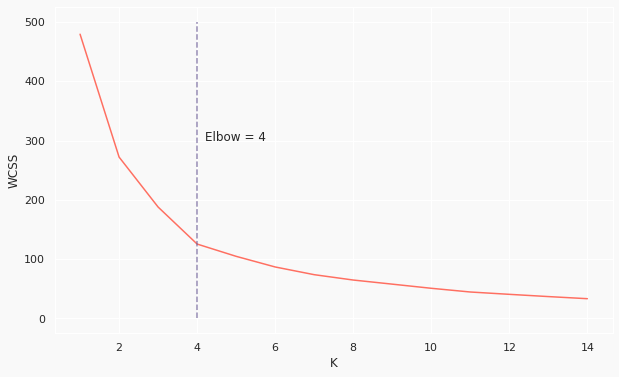

In [52]:
plt.figure(figsize=(10,6))
wcss_list = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++'  , random_state = 1)
    kmeans.fit(PCAdata) 
    wcss_list.append(kmeans.inertia_)

plt.plot(range(1,15) , wcss_list)
plt.plot([4,4] , [0 , 500] , linestyle = '--' , alpha = 0.7)
plt.text(4.2 , 300 , 'Elbow = 4')
plt.xlabel('K' )
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 4 , init = 'k-means++'  , random_state = 1)
kmeans.fit(PCAdata)
cluster_pred = kmeans.predict(PCAdata)

In [54]:
resultData = pd.DataFrame()
resultData['PC1'] = PCAdata[:,0]
resultData['PC2'] = PCAdata[:,1]
resultData['ClusterID'] = cluster_pred

<a id = "6_2"></a>
<h2>6-2. KMeans clustered plot</h2>

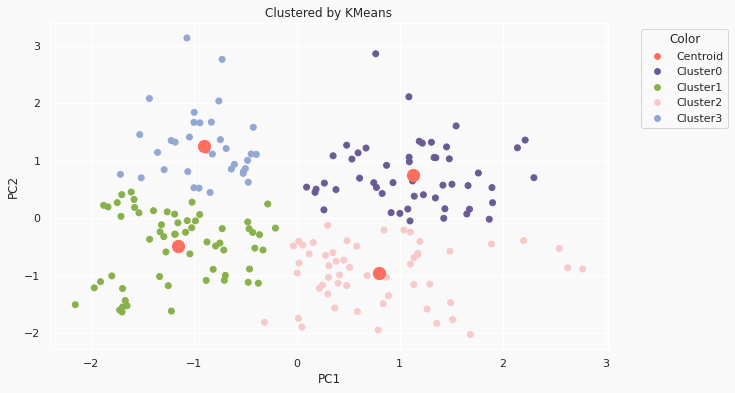

In [55]:
plt.figure(figsize=(10,6))

# Updating the color palette
palette = {"Centroid":"#FF6F61", "Cluster0":"#6B5B95", "Cluster1":"#88B04B", 
           "Cluster2":"#F7CAC9", "Cluster3":"#92A8D1"}

# Mapping cluster IDs to colors
resultData['ClusterColor'] = resultData['ClusterID'].map({0: "#6B5B95", 1: "#88B04B", 
                                                          2: "#F7CAC9", 3: "#92A8D1"})

# Plotting clusters
plt.scatter(x=resultData['PC1'], y=resultData['PC2'], c=resultData['ClusterColor'])

# Creating legend handles
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) 
           for k, v in palette.items()]
plt.legend(title='Color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Plotting centroids
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
            marker='o', c='#FF6F61', s=150, alpha=1)

# Setting plot title and labels
pltFont = {'family':'serif', 'size':14}
plt.title("Clustered by KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Applying seaborn style
sns.set(rc={"axes.facecolor":"#F9F9F9", "figure.facecolor":"#F9F9F9"})

# Displaying the plot
plt.show()

Linear Regression Model Performance:
Cross-Validated Scores: [ 0.18767216 -1.32707823 -6.62722549  0.04962083  0.12415531]
Mean Cross-Validated Score: -1.52
Mean Squared Error (MSE) on Test Set: 468.05
R-Squared (R²) on Test Set: 0.05

Regression Coefficients: [-0.59177448]
Intercept: 74.80242451588705

--- Detailed Statistics ---
Slope: -0.59
Intercept: 74.80
R-Value: -0.31
P-Value: 0.00
Standard Error: 0.14


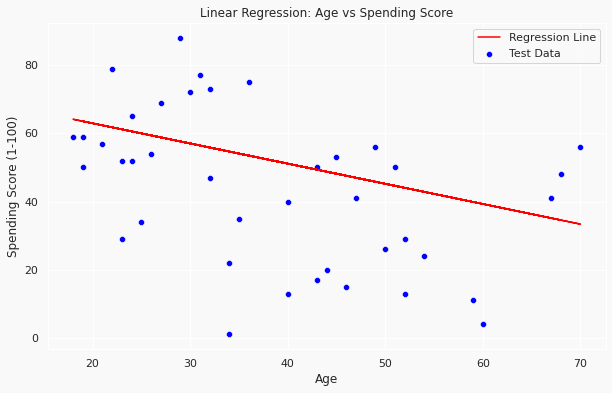

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

X = data[['Age']]
y = data['Spending Score (1-100)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cv_scores = cross_val_score(model, X, y, cv=5)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Model Performance:')
print(f'Cross-Validated Scores: {cv_scores}')
print(f'Mean Cross-Validated Score: {np.mean(cv_scores):.2f}')
print(f'Mean Squared Error (MSE) on Test Set: {mse:.2f}')
print(f'R-Squared (R²) on Test Set: {r2:.2f}')

print(f'\nRegression Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train.squeeze(), y_train)

print("\n--- Detailed Statistics ---")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-Value: {r_value:.2f}")
print(f"P-Value: {p_value:.2f}")
print(f"Standard Error: {std_err:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Age'], y=y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()